In [7]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [57]:
import numpy as np

In [8]:
IMAGE_SIZE=256
BATCH_SIZE=32 # usually batch size is 32 thats why we have taken 32 # to reduce processing time

In [9]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    'PlantVillage',
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [10]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [11]:
len(dataset)

68

In [17]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
    print(image_batch[0].numpy())

(32, 256, 256, 3)
[1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 0 0 1 2 1 1]
[[[185. 163. 165.]
  [181. 159. 161.]
  [176. 154. 156.]
  ...
  [209. 199. 198.]
  [211. 201. 200.]
  [214. 204. 203.]]

 [[181. 159. 161.]
  [179. 157. 159.]
  [177. 155. 157.]
  ...
  [212. 202. 201.]
  [212. 202. 201.]
  [214. 204. 203.]]

 [[178. 156. 158.]
  [177. 155. 157.]
  [179. 157. 159.]
  ...
  [216. 206. 205.]
  [215. 205. 204.]
  [214. 204. 203.]]

 ...

 [[148. 126. 129.]
  [149. 127. 130.]
  [154. 132. 135.]
  ...
  [179. 168. 176.]
  [177. 166. 174.]
  [175. 164. 172.]]

 [[156. 134. 137.]
  [154. 132. 135.]
  [155. 133. 136.]
  ...
  [181. 170. 178.]
  [180. 169. 177.]
  [180. 169. 177.]]

 [[159. 137. 140.]
  [156. 134. 137.]
  [157. 135. 138.]
  ...
  [182. 171. 179.]
  [182. 171. 179.]
  [183. 172. 180.]]]


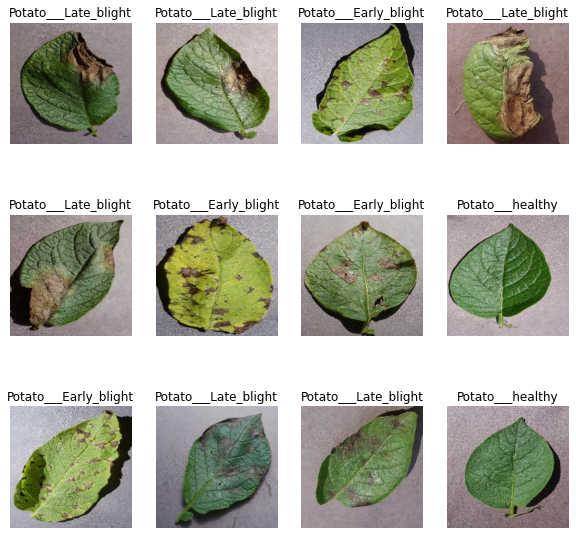

In [18]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

80% ==>training
20% ==> 10% validation, 10% test

In [19]:
train_size =0.8
len(dataset)*train_size

54.400000000000006

In [21]:
train_ds=dataset.take(54)
len(train_ds)

54

In [22]:
test_ds=dataset.skip(54)
len(test_ds)


14

In [23]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [24]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [25]:
test_ds= test_ds.skip(6)
len(test_ds)

8

In [27]:
def get_dataset_partition_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    
    ds_size=len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
        
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    
    train_ds=ds.take(train_size)
    
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds

In [29]:
train_ds,val_ds,test_ds=get_dataset_partition_tf(dataset)

In [30]:
len(train_ds)

54

In [31]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [33]:
resize_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255) #normalisation 255==> RGB(Range 0 to 255)
])

In [34]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2) 
])

EDA OVER

In [35]:
# Build model
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,3)
n_classes=3
model=models.Sequential([
    resize_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(n_classes,activation='softmax')
        
])
model.build(input_shape=input_shape)

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [37]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [39]:
EPOCHS=10
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/10
54/54 [==============================] - 64s 1s/step - loss: 0.3644 - accuracy: 0.8530 - val_loss: 0.2837 - val_accuracy: 0.8906
Epoch 2/10
54/54 [==============================] - 63s 1s/step - loss: 0.2775 - accuracy: 0.9016 - val_loss: 0.2678 - val_accuracy: 0.8906
Epoch 3/10
54/54 [==============================] - 64s 1s/step - loss: 0.2758 - accuracy: 0.8883 - val_loss: 0.3184 - val_accuracy: 0.8542
Epoch 4/10
54/54 [==============================] - 66s 1s/step - loss: 0.2572 - accuracy: 0.8999 - val_loss: 0.2377 - val_accuracy: 0.8958
Epoch 5/10
54/54 [==============================] - 64s 1s/step - loss: 0.2135 - accuracy: 0.9126 - val_loss: 0.3017 - val_accuracy: 0.8542
Epoch 6/10
54/54 [==============================] - 64s 1s/step - loss: 0.2255 - accuracy: 0.9149 - val_loss: 0.2474 - val_accuracy: 0.8958
Epoch 7/10
54/54 [==============================] - 68s 1s/step - loss: 0.1625 - accuracy: 0.9358 - val_loss: 0.2804 - val_accuracy: 0.8958
Epoch 8/10
54/54 [==

In [40]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 3s 256ms/step - loss: 0.1295 - accuracy: 0.9453


In [41]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 54}

In [42]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [44]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

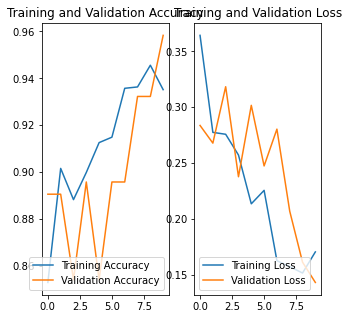

In [55]:
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Training loss
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc='lower left')
plt.title('Training and Validation Loss')
plt.show()

First image to predict
Actual label: Potato___Early_blight
1/1 [==============================] - 0s 247ms/step
Predicted label: Potato___Early_blight


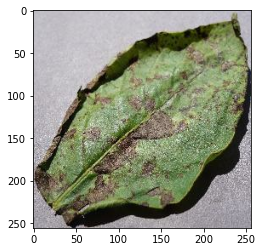

In [58]:
for images_batch, labels_batch in test_ds.take(1):
    
    first_image=images_batch[0].numpy().astype('uint8')
    first_label=labels_batch[0].numpy()
    
    print("First image to predict")
    plt.imshow(first_image)
    print("Actual label:",class_names[first_label])
    
    batch_prediction=model.predict(images_batch)
    print("Predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    
    

In [63]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0)
    
    predictions=model.predict(img_array)
    
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)                
    return predicted_class,confidence

1/1 [==============================] - 0s 26ms/step


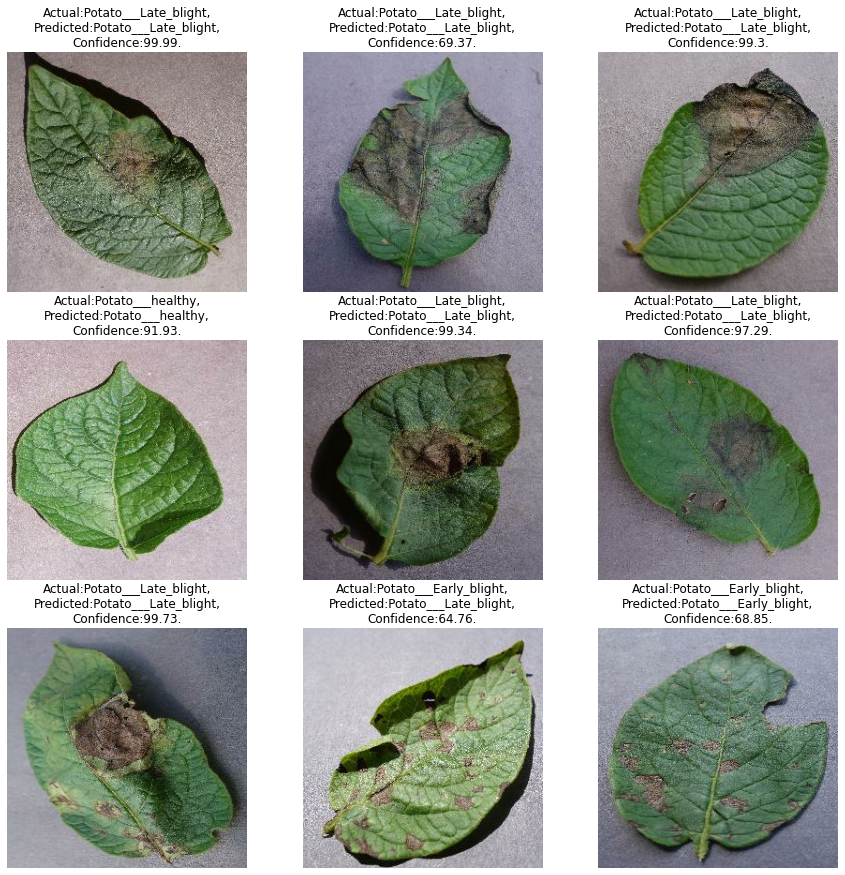

In [65]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class,confidence=predict(model,images[i].numpy())
        actual_class=class_names[labels[i]]
        
        plt.title(f"Actual:{actual_class},\nPredicted:{predicted_class},\nConfidence:{confidence}.")
        plt.axis("off")